In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import csv
import numpy as np
import random
import mplcursors 




In [2]:
data = pd.read_csv("googleplaystore.csv")

In [3]:
data.head()



,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [4]:
data.describe()


,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


In [5]:
data_null = data[data.Rating.isnull()]
print(data_null)

                                       App             Category  Rating  \
23                  Mcqueen Coloring pages       ART_AND_DESIGN     NaN   
113              Wrinkles and rejuvenation               BEAUTY     NaN   
123                 Manicure - nail design               BEAUTY     NaN   
126           Skin Care and Natural Beauty               BEAUTY     NaN   
129    Secrets of beauty, youth and health               BEAUTY     NaN   
...                                    ...                  ...     ...   
10824                            Cardio-FR              MEDICAL     NaN   
10825                   Naruto & Boruto FR               SOCIAL     NaN   
10831             payermonstationnement.fr  MAPS_AND_NAVIGATION     NaN   
10835                             FR Forms             BUSINESS     NaN   
10838               Parkinson Exercices FR              MEDICAL     NaN   

      Reviews  Size  Installs  Type Price Content Rating  \
23         61  7.0M  100,000+  Free    

In [6]:
data_null.isnull().sum()


App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          4
Android Ver          0
dtype: int64

### Drop null values in Ratings Column

In [7]:
drop_empty = data.dropna(subset = ['Rating'],how='any')

In [8]:
print(drop_empty)

                                                     App             Category  \
0         Photo Editor & Candy Camera & Grid & ScrapBook       ART_AND_DESIGN   
1                                    Coloring book moana       ART_AND_DESIGN   
2      U Launcher Lite – FREE Live Cool Themes, Hide ...       ART_AND_DESIGN   
3                                  Sketch - Draw & Paint       ART_AND_DESIGN   
4                  Pixel Draw - Number Art Coloring Book       ART_AND_DESIGN   
...                                                  ...                  ...   
10834                                      FR Calculator               FAMILY   
10836                                   Sya9a Maroc - FR               FAMILY   
10837                   Fr. Mike Schmitz Audio Teachings               FAMILY   
10839                      The SCP Foundation DB fr nn5n  BOOKS_AND_REFERENCE   
10840      iHoroscope - 2018 Daily Horoscope & Astrology            LIFESTYLE   

       Rating Reviews      

In [9]:
free_apps = data[data.Type == 'Free']


In [10]:
free_apps.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [11]:
cat_count = pd.value_counts(data.Category)
print(cat_count)

FAMILY                 1972
GAME                   1144
TOOLS                   843
MEDICAL                 463
BUSINESS                460
PRODUCTIVITY            424
PERSONALIZATION         392
COMMUNICATION           387
SPORTS                  384
LIFESTYLE               382
FINANCE                 366
HEALTH_AND_FITNESS      341
PHOTOGRAPHY             335
SOCIAL                  295
NEWS_AND_MAGAZINES      283
SHOPPING                260
TRAVEL_AND_LOCAL        258
DATING                  234
BOOKS_AND_REFERENCE     231
VIDEO_PLAYERS           175
EDUCATION               156
ENTERTAINMENT           149
MAPS_AND_NAVIGATION     137
FOOD_AND_DRINK          127
HOUSE_AND_HOME           88
AUTO_AND_VEHICLES        85
LIBRARIES_AND_DEMO       85
WEATHER                  82
ART_AND_DESIGN           65
EVENTS                   64
COMICS                   60
PARENTING                60
BEAUTY                   53
1.9                       1
Name: Category, dtype: int64


In [12]:
mean_encode = data.groupby('Category')['Rating'].mean()
print(mean_encode)

Category
1.9                    19.000000
ART_AND_DESIGN          4.358065
AUTO_AND_VEHICLES       4.190411
BEAUTY                  4.278571
BOOKS_AND_REFERENCE     4.346067
BUSINESS                4.121452
COMICS                  4.155172
COMMUNICATION           4.158537
DATING                  3.970769
EDUCATION               4.389032
ENTERTAINMENT           4.126174
EVENTS                  4.435556
FAMILY                  4.192272
FINANCE                 4.131889
FOOD_AND_DRINK          4.166972
GAME                    4.286326
HEALTH_AND_FITNESS      4.277104
HOUSE_AND_HOME          4.197368
LIBRARIES_AND_DEMO      4.178462
LIFESTYLE               4.094904
MAPS_AND_NAVIGATION     4.051613
MEDICAL                 4.189143
NEWS_AND_MAGAZINES      4.132189
PARENTING               4.300000
PERSONALIZATION         4.335987
PHOTOGRAPHY             4.192114
PRODUCTIVITY            4.211396
SHOPPING                4.259664
SOCIAL                  4.255598
SPORTS                  4.223511
T

In [13]:
## Use axis to display get rating and count to display in same row for that unique category item


In [14]:
concat_rating = pd.concat([cat_count, mean_encode], axis=1)
concat_rating.head(50)

,Category,Rating
FAMILY,1972,4.192272
GAME,1144,4.286326
TOOLS,843,4.047411
MEDICAL,463,4.189143
BUSINESS,460,4.121452
PRODUCTIVITY,424,4.211396
PERSONALIZATION,392,4.335987
COMMUNICATION,387,4.158537
SPORTS,384,4.223511
LIFESTYLE,382,4.094904


In [15]:
print(data.Rating.max())

19.0


In [16]:
outlier = pd.DataFrame({'Rating' : [19]})
print(outlier)


   Rating
0      19


In [17]:
data.describe()


,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


### Find specific row

In [18]:
outlier = data[data.Category == '1.9']
print(outlier)

                                           App Category  Rating Reviews  \
10472  Life Made WI-Fi Touchscreen Photo Frame      1.9    19.0    3.0M   

         Size Installs Type     Price Content Rating             Genres  \
10472  1,000+     Free    0  Everyone            NaN  February 11, 2018   

      Last Updated Current Ver Android Ver  
10472       1.0.19  4.0 and up         NaN  


### Delete previous located row as data does not fit category and rating system


In [19]:
drop_row = data.drop([10472], axis='rows')
drop_row.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [20]:
data = data.dropna()

In [21]:
data = data.reset_index()

In [22]:
concat_rating = pd.concat([cat_count, mean_encode], axis=1)
concat_rating.head(50)

,Category,Rating
FAMILY,1972,4.192272
GAME,1144,4.286326
TOOLS,843,4.047411
MEDICAL,463,4.189143
BUSINESS,460,4.121452
PRODUCTIVITY,424,4.211396
PERSONALIZATION,392,4.335987
COMMUNICATION,387,4.158537
SPORTS,384,4.223511
LIFESTYLE,382,4.094904


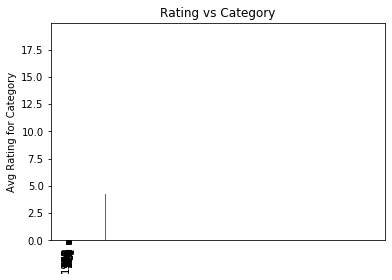

In [23]:
x = range(35)
plt.bar(cat_count, mean_encode)
plt.xticks(x, cat_count, rotation='vertical')
plt.title('Rating vs Category')
plt.ylabel('Avg Rating for Category')
plt.show()

In [24]:
data.Rating


0       4.1
1       3.9
2       4.7
3       4.5
4       4.3
       ... 
9355    4.0
9356    4.5
9357    5.0
9358    4.5
9359    4.5
Name: Rating, Length: 9360, dtype: float64

In [25]:
cat_count = pd.value_counts(data.Category)
print(cat_count)

FAMILY                 1746
GAME                   1097
TOOLS                   733
PRODUCTIVITY            351
MEDICAL                 350
COMMUNICATION           328
FINANCE                 323
SPORTS                  319
PHOTOGRAPHY             317
LIFESTYLE               314
PERSONALIZATION         312
BUSINESS                303
HEALTH_AND_FITNESS      297
SOCIAL                  259
SHOPPING                238
NEWS_AND_MAGAZINES      233
TRAVEL_AND_LOCAL        226
DATING                  195
BOOKS_AND_REFERENCE     178
VIDEO_PLAYERS           160
EDUCATION               155
ENTERTAINMENT           149
MAPS_AND_NAVIGATION     124
FOOD_AND_DRINK          109
HOUSE_AND_HOME           76
WEATHER                  75
AUTO_AND_VEHICLES        73
LIBRARIES_AND_DEMO       64
ART_AND_DESIGN           61
COMICS                   58
PARENTING                50
EVENTS                   45
BEAUTY                   42
Name: Category, dtype: int64


In [26]:
mean_encode = data.groupby('Category')['Rating'].mean()
print(mean_encode)

Category
ART_AND_DESIGN         4.377049
AUTO_AND_VEHICLES      4.190411
BEAUTY                 4.278571
BOOKS_AND_REFERENCE    4.346067
BUSINESS               4.121452
COMICS                 4.155172
COMMUNICATION          4.158537
DATING                 3.970769
EDUCATION              4.389032
ENTERTAINMENT          4.126174
EVENTS                 4.435556
FAMILY                 4.192383
FINANCE                4.131889
FOOD_AND_DRINK         4.166972
GAME                   4.286326
HEALTH_AND_FITNESS     4.277104
HOUSE_AND_HOME         4.197368
LIBRARIES_AND_DEMO     4.179688
LIFESTYLE              4.094904
MAPS_AND_NAVIGATION    4.051613
MEDICAL                4.189143
NEWS_AND_MAGAZINES     4.132189
PARENTING              4.300000
PERSONALIZATION        4.335256
PHOTOGRAPHY            4.192114
PRODUCTIVITY           4.211396
SHOPPING               4.259664
SOCIAL                 4.255598
SPORTS                 4.223511
TOOLS                  4.047203
TRAVEL_AND_LOCAL       4.109292

In [27]:
total_mean = np.mean(data)
print(total_mean['Rating'])

4.191837606837612


In [28]:
data.dtypes

index               int64
App                object
Category           object
Rating            float64
Reviews            object
Size               object
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [29]:
Rating_mean = data.Rating.mean()


In [30]:
mean_encode.mean()
print(mean_encode.mean())

4.202731987013325


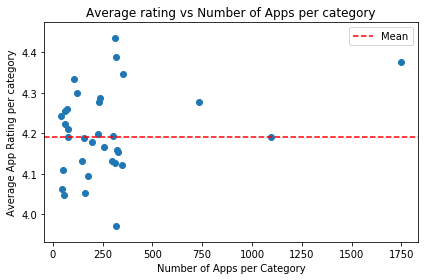

In [31]:

plt.scatter(cat_count, mean_encode)
mplcursors.cursor().connect(
    "add", lambda sel: sel.annotation.set_text(concat_rating[cat_count][sel.target.index]))


plt.axhline(y = total_mean['Rating'], xmin=0, xmax=1800, color = 'red', linestyle='--')
plt.title('Average rating vs Number of Apps per category')
plt.ylabel('Average App Rating per category')
plt.xlabel('Number of Apps per Category')


plt.legend(['Mean'])
plt.tight_layout()


plt.show()

In [32]:
concat_rating.rename( columns={0:'App Category', 'Category': 'Count', 'Rating': 'Avg Rating'}, inplace=True)

In [33]:
concat_rating = pd.concat([cat_count, mean_encode], axis=1)
concat_rating.rename( columns={ 'Category': 'Count', 'Rating': 'Avg Rating'}, inplace=True)



concat_rating.head(50)

,Count,Avg Rating
FAMILY,1746,4.192383
GAME,1097,4.286326
TOOLS,733,4.047203
PRODUCTIVITY,351,4.211396
MEDICAL,350,4.189143
COMMUNICATION,328,4.158537
FINANCE,323,4.131889
SPORTS,319,4.223511
PHOTOGRAPHY,317,4.192114
LIFESTYLE,314,4.094904


In [34]:
concat_rating.rename_axis('').rename_axis('App Category', axis='columns')

App Category,Count,Avg Rating
,,
FAMILY,1746,4.192383
GAME,1097,4.286326
TOOLS,733,4.047203
PRODUCTIVITY,351,4.211396
MEDICAL,350,4.189143
COMMUNICATION,328,4.158537
FINANCE,323,4.131889
SPORTS,319,4.223511
PHOTOGRAPHY,317,4.192114


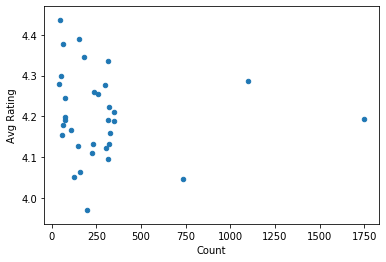

In [35]:
import mplcursors
from pandas import DataFrame

df = concat_rating

df.plot.scatter("Count", "Avg Rating")
mplcursors.cursor().connect(
    "add", lambda sel: sel.annotation.set_text(df["App Category"][sel.target.index]))
plt.show()